In [2]:
#Section 1 - API Download
import sentinelsat
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date
import geopandas as gpd
import pandas
import zipfile
import os
import shutil
import matplotlib.pyplot as plt

#Define paths
path2 = '/Users/danielnephew/Documents/sia/named'
path3 = '/Users/danielnephew/Documents/sia'
os.chdir(path3)
current_dir = os.getcwd()

#Create folder for unzipped files
if not os.path.exists('unzipped'):
    os.mkdir('unzipped')

#Hail Sentinel API
api = SentinelAPI('dnephew', 'Tartaruga2', 'https://apihub.copernicus.eu/apihub')

#Define target area GeoJson
my_geojson = {"type":"FeatureCollection","features":[{"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-81.585018,28.402086],[-81.584433,28.40334],[-81.583629,28.403619],[-81.575797,28.403565],[-81.574177,28.399708],[-81.574129,28.397843],[-81.575347,28.397854],[-81.575274,28.397543],[-81.579963,28.397554],[-81.580852,28.3966],[-81.5814,28.396622],[-81.583837,28.399322],[-81.584543,28.400179],[-81.585018,28.402086]]]}}]}
footprint = geojson_to_wkt(my_geojson)

current_dir = os.getcwd()      

#Define target timeframe
years = [
    2019,2020,2021
]

#Loop to run API extraction through target years and months
for year in years:
    for month in range(3,12+1):
        date1 = str(year) + str(month-1) + str('01')
        date2 = str(year) + str(month) + str('01')
        date = (date1,date2)
        print(str(month-1) + str('.') + str(year))
        try:
            products = api.query(
                footprint,
                date = date,
                platformname = 'Sentinel-2',
            )
            #Sort all images and download with least cloud percentage
            products_df = api.to_dataframe(products)
            products_df_sorted = products_df.sort_values(['cloudcoverpercentage'], ascending=[True])
            products_df_sorted = products_df_sorted.head(1)
            api.download_all(products_df_sorted.index)
        
            title = products_df_sorted
            for row in title.iterrows():
                title1 = title.iterrows
                title1 = row[1]['title']

            #Unzip files
            with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
                zip_ref.extractall('unzipped')
            
            #Find RGB image, rename, and move to folder
            for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
                try:
                    for file in files:
                        if file.endswith("TCI.jp2"):
                            file1 = os.path.join(path, file)
                            os.rename(file1,str(month-1)+'.'+str(year)+'.jp2')
                            shutil.move(str(month-1)+'.'+str(year)+'.jp2','/Users/danielnephew/Documents/sia/named') 
                except FileNotFoundError:
                    print('No TCI file/Manually add')
                    pass
            
        except KeyError:
            print('Error products')
            pass

try:
    product1 = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = ('20191201', '20191230'),
    )
    print("12.2019")
    product1_df = api.to_dataframe(product1)
    product1_df_sorted = product1_df.sort_values(['cloudcoverpercentage'], ascending=[True])
    product1_df_sorted = product1_df_sorted.head(1)
    api.download_all(product1_df_sorted.index)


    title = product1_df_sorted
    for row in title.iterrows():
        title1 = title.iterrows
        title1 = row[1]['title']

    with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
        zip_ref.extractall('unzipped')

    for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
        for file in files:
            try:
                if file.endswith("TCI.jp2"):
                    file1 = os.path.join(path, file)
                    os.rename(file1,'12.2019.jp2')
                    shutil.move('12.2019.jp2','/Users/danielnephew/Documents/sia/named') 
            except FileNotFoundError:
                print('No TCI file/Manually add')
                pass
            
#API erros exception
#Attempt to download
except KeyError:
    print('Error product1')
    pass

try:
    product2 = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = ('20201201', '2021101'),
    )
    print("12.2020")
    product2_df = api.to_dataframe(product2)
    product2_df_sorted = product2_df.sort_values(['cloudcoverpercentage'], ascending=[True])
    product2_df_sorted = product2_df_sorted.head(1)
    api.download_all(product2_df_sorted.index)
    title = product2_df_sorted
    for row in title.iterrows():
        title1 = title.iterrows
        title1 = row[1]['title']

    with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
        zip_ref.extractall('unzipped')

    for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
        for file in files:
            try:
                if file.endswith("TCI.jp2"):
                    file1 = os.path.join(path, file)
                    os.rename(file1,'12.2020.jp2')
                    shutil.move('12.2020.jp2','/Users/danielnephew/Documents/sia/named')
            except FileNotFoundError:
                print('No TCI file/Manually add')
                pass
            
except KeyError:
    print('Error product2')
    pass

try:
    product3 = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = ('20190101', '20190201'),
        cloudcoverpercentage = (0,10),
        limit=1
    )
    print("1.2019")
    product3_df = api.to_dataframe(product3)
    product3_df_sorted = product3_df.sort_values(['cloudcoverpercentage'], ascending=[True])
    product3_df_sorted = product3_df_sorted.head(1)
    api.download_all(product3_df_sorted.index)
    title = product3_df_sorted
    for row in title.iterrows():
        title1 = title.iterrows
        title1 = row[1]['title']

    with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
        zip_ref.extractall('unzipped')

    for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
        for file in files:
            try:
                if file.endswith("TCI_10m.jp2"):
                    file1 = os.path.join(path, file)
                    os.rename(file1,'1.2019.jp2')
                    shutil.move('1.2019.jp2','/Users/danielnephew/Documents/sia/named')
            except FileNotFoundError:
                print('No TCI file/Manually add')
                pass
            
except KeyError:
    print('Error product3')
    pass

try:
    #API Dataset Offline
    product4 = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = ('2020101', '2020130'),
    )
    print("1.2020")
    product4_df = api.to_dataframe(product4)
    product4_df_sorted = product4_df.sort_values(['cloudcoverpercentage'], ascending=[True])
    product4_df_sorted = product4_df_sorted.head(1)
    api.download_all(product4_df_sorted.index)
    title = product4_df_sorted
    for row in title.iterrows():
        title1 = title.iterrows
        title1 = row[1]['title']

    with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
        zip_ref.extractall('unzipped')

    for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
        for file in files:
            try:
                if file.endswith("TCI.jp2"):
                    file1 = os.path.join(path, file)
                    os.rename(file1,'1.2020.jp2')
                    shutil.move('1.2020.jp2','/Users/danielnephew/Documents/sia/named')
            except FileNotFoundError:
                print('No TCI file/Manually add')
                pass
            
except KeyError:
    print('Error product4')
    pass

try:
    #API Dataset Offline
    product5 = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = ('2021101', '2021130'),
    )
    print("1.2021")
    product5_df = api.to_dataframe(product5)
    product5_df_sorted = product5_df.sort_values(['cloudcoverpercentage'], ascending=[True])
    product5_df_sorted = product5_df_sorted.head(1)
    api.download_all(product5_df_sorted.index)
    title = product5_df_sorted
    for row in title.iterrows():
        title1 = title.iterrows
        title1 = row[1]['title']

    with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
        zip_ref.extractall('unzipped')

    for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
        for file in files:
            try:
                if file.endswith("TCI.jp2"):
                    file1 = os.path.join(path, file)
                    os.rename(file1,'1.2021.jp2')
                    shutil.move('1.2021.jp2','/Users/danielnephew/Documents/sia/named')
            except FileNotFoundError:
                print('No TCI file/Manually add')
                pass
            
except KeyError:
    print('Error product5')
    pass

try:
    product6 = api.query(
        footprint,
        platformname = 'Sentinel-2',
        date = ('20211201', '20211230'),
    )
    print("12.2021")
    product6_df = api.to_dataframe(product6)
    product6_df_sorted = product6_df.sort_values(['cloudcoverpercentage'], ascending=[True])
    product6_df_sorted = product6_df_sorted.head(1)
    api.download_all(product6_df_sorted.index)
    title = product6_df_sorted
    for row in title.iterrows():
        title1 = title.iterrows
        title1 = row[1]['title']

    with zipfile.ZipFile(str(title1) + str('.zip'), 'r') as zip_ref:
        zip_ref.extractall('unzipped')

    for path, currentDirectory, files in os.walk('/Users/danielnephew/Documents/sia/unzipped/'+str(title1)+'.SAFE'):
        for file in files:
            try:
                if file.endswith("TCI.jp2"):
                    file1 = os.path.join(path, file)
                    os.rename(file1,'12.2021.jp2')
                    shutil.move('12.2021.jp2','/Users/danielnephew/Documents/sia/named') 
            except FileNotFoundError:
                print('No TCI file/Manually add')
                pass

except KeyError:
    print('Error product6')
    pass

print('Downloads complete')

2.2019


Error: Destination path '/Users/danielnephew/Documents/sia/named/2.2019.jp2' already exists

[{'type': 'Polygon', 'coordinates': [[[442718.75876470795, 3141853.2678216496], [442732.4362107091, 3141764.9038605513], [442797.26849554444, 3141599.516183481], [443017.22039175703, 3141604.877664531], [442984.28594074846, 3141702.3080344144], [442952.87886495434, 3141852.1335630943], [442718.75876470795, 3141853.2678216496]]]}]


AttributeError: 'numpy.ndarray' object has no attribute 'set_title'

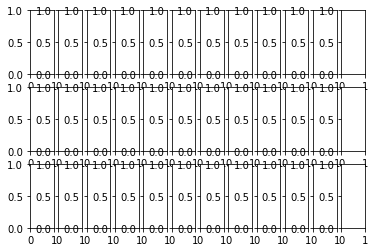

In [6]:
#Section 2 - Image Clipping
import rasterio
from rasterio.mask import mask
import matplotlib.pyplot as plt

#Change UTM coordinates to projected
my_geojson2 = [{"type":"Polygon","coordinates":[[[442718.75876470795, 3141853.2678216496], [442732.4362107091, 3141764.9038605513], [442797.26849554444, 3141599.516183481], [443017.22039175703, 3141604.877664531], [442984.28594074846, 3141702.3080344144], [442952.87886495434, 3141852.1335630943], [442718.75876470795, 3141853.2678216496]]]}]

print(my_geojson2)

#Define folder to export clipped image
output_folder = 'clipped'

if not os.path.exists(output_folder):
    os.mkdir(output_folder)

#Define path
path4 = path3+'/clipped'
os.chdir(path4)

ext = ('.jp2')

#Loop to run clipping for each images
for file in os.listdir(path2):
    if file.endswith(ext):
        with rasterio.open(path2+'/'+file) as img:
            clipped, transform = mask(img, my_geojson2, crop=True)
            meta = img.meta.copy()
            meta.update(
                {
                    "transform": transform,
                    "height":clipped.shape[1],
                    "width":clipped.shape[2]
                }
            )
            name = str(file)
            with rasterio.open(name, 'w', **meta) as dst:
                dst.write(clipped)
            print('Writing complete')
            print(file)
            from rasterio.plot import show
            show(clipped)
    else:
        continue

In [ ]:
#Section 3 - Object Detection
import os
import rasterio
from rasterio.plot import show
from rasterio.features import shapes
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
from collections import Counter

#Define path
path3 = '/Users/danielnephew/Documents/sia'
os.chdir(path3+'/clipped')

#7.2019 and 6.2021 discarted due to cloud

#No loop due to bug
#Loop per file name
name = ['1.2019.jp2','2.2019.jp2','3.2019.jp2','4.2019.jp2','5.2019.jp2','6.2019.jp2','8.2019.jp2','9.2019.jp2','10.2019.jp2','11.2019.jp2','12.2019.jp2',
        '2.2020.jp2','12.2020.jp2','11.2020.jp2','12.2020.jp2',
        '2.2021.jp2','3.2021.jp2','4.2021.jp2','5.2021.jp2','7.2021.jp2','8.2021.jp2','9.2021.jp2','10.2021.jp2','11.2021.jp2','12.2021.jp2',
        ]
#Define parameters for each optimal value for vehicle extraction for each image
#Skips images that require more tailored extraction
param = [50,80,80,80,80,80,80,90,80,80,70,
         80,80,100,1,
         1,100,100,110,104,100,100,80,1,1
        ]

#Define loop for two variables
dic=dict(zip(name, param))
for x,y in zip(name, param):
    globals()[x] = y
    file = x
    my_image= rasterio.open(file)
    print(file)

    red = my_image.read(1)
    green = my_image.read(2)
    blue = my_image.read(3)
    show(blue, cmap='Blues')

    red = np.float32(red)
    green = np.float32(green)
    blue = np.float32(blue)
    print('blue')
    print(blue)
    print('green')
    print(green)
    print('red')
    print(red)
    
    red = np.float32(red)
    green = np.float32(green)
    blue = np.float32(blue)
    car_index = np.zeros(blue.shape)
    car_index[blue > y] = 1
    plt.imshow(car_index)
    car_index = car_index.astype('float32')
    my_shapes = shapes(car_index)
    
#Auxiliary data to manually analyze and find optimal value for extraction
#Utilize histogram, data arrays, and most common value in array
    fig, (ax1, ax2) = plt.subplots(2,2)
    blue_data = blue[np.not_equal(blue, my_image.nodata)]
    red_data = red[np.not_equal(red, my_image.nodata)]
    green_data = green[np.not_equal(green, my_image.nodata)]
    bin_number = 80
    ax1[0].hist(blue_data, color='blue', bins=bin_number)
    ax1[1].hist(red_data, color='red', bins=bin_number)
    ax2[0].hist(green_data, color='green', bins=bin_number)
    ax1[0].set_title('Blue Histogram')
    ax1[1].set_title('Red Histogram')
    ax2[0].set_title('Green Histogram')
    fig.tight_layout()
    b = Counter(red_data)
    print (b.most_common())
    car_index = np.zeros(blue.shape)
    car_index[blue > y] = 1
    plt.imshow(car_index)
    car_index = car_index.astype('float32')
    my_shapes = shapes(car_index)


        #Manual adjustment
    if file =='12.2020.jp2':
        red = np.float32(red)
        green = np.float32(green)
        blue = np.float32(blue)
        print('red')
        print(red)
        car_index = np.zeros(blue.shape)
        car_index[blue<95] = 1
        car_index[blue==92] = 0
        car_index[blue>99] = 0
        car_index[blue<80] = 0
        plt.imshow(car_index)
        car_index = car_index.astype('float32')
        my_shapes = shapes(car_index)
        
        #Manual adjustment
    if file =='2.2021.jp2':
        red = np.float32(red)
        green = np.float32(green)
        blue = np.float32(blue)
        car_index = np.zeros(blue.shape)
        car_index[blue > 70] = 1
        car_index[blue== 90] = 0
        car_index[blue== 94] = 0
        car_index[red > 70] = 1
        car_index[red == 70] = 0
        car_index[red == 74] = 0
        plt.imshow(car_index)
        car_index = car_index.astype('float32')
        my_shapes = shapes(car_index)
        
        #Manual adjustment
    if file =='12.2021.jp2':
        red = np.float32(red)
        green = np.float32(green)
        blue = np.float32(blue)
        car_index = np.zeros(blue.shape)
        car_index[blue > 90] = 1
        car_index[green > 70] = 1
        plt.imshow(car_index)
        car_index = car_index.astype('float32')
        my_shapes = shapes(car_index)
        
        #Manual adjustment
    if file =='11.2021.jp2':
        red = np.float32(red)
        green = np.float32(green)
        blue = np.float32(blue)
        car_index = np.zeros(blue.shape)
        car_index[blue > 90] = 1
        car_index[red == 70] = 0
        car_index[red == 74] = 0
        car_index[red == 78] = 0
        plt.imshow(car_index)
        car_index = car_index.astype('float32')
        my_shapes = shapes(car_index)

#Define output folder
    os.chdir(path3)
    output_folder = 'shapes'
    if not os.path.exists(output_folder):
        os.mkdir(output_folder)

#Transform CRS
    def transform_coordinates(pair):
        geo_coords = my_image.xy(pair[1],pair[0])
        return [geo_coords[0], geo_coords[1]]

    for car in my_shapes:
        coordinates = [transform_coordinates(pair) for pair in car[0]['coordinates'][0]]
        break
    output = []
    for car_shape in my_shapes:
        coords = car_shape[0]['coordinates'][0]
        geographic_coords = [transform_coordinates(pair) for pair in coords]
        output.append({
            'geometry' : {
                'type':'Polygon',
                'coordinates': [geographic_coords],
                },
            'properties': {},
        }) 
    
#Extract second largest area
#First largest area is always a false positive, discart
    data_to_write = gpd.GeoDataFrame.from_features(output, crs='epsg:32617')
    name = str(file)
    data_to_write.to_file('shapes/'+str(file)+'_car_shape.shp')

    data = gpd.read_file('shapes/'+str(file)+'_car_shape.shp')
    data = data.to_crs('epsg:3857')

    data['area'] = data['geometry'].area 

    title = file.replace('.jp2', '')
    sorted = data.sort_values(['area'], ascending = False)
    extract = sorted.head(2)
    sorted2 = extract.sort_values(['area'], ascending = True)
    extract2 = sorted2.head(1)
    write = extract2.to_crs('epsg:32617')
    os.chdir(path3+'/carareas')
    write.to_file(str(title)+".shp")
    os.chdir(path3+'/clipped')

#Shape extraction exceptions due to car clusters being separated
#Exceptions
    if file =='2.2019.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustments
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(1)
        print(sorted)
        write = extract.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("2.2019.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='1.2019.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustments
        sorted = data.sort_values(['area'], ascending = False)
        print(sorted)
        drop = sorted.drop(3)
        write = drop.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("1.2019.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='2.2021.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustments
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(10)
        sorted2 = extract.sort_values(['area'], ascending = True)
        extract2 = sorted2.head(6)
        sorted3 = extract2.sort_values(['area'], ascending = False)
        extract3 = sorted3.head(3)
        write = extract3.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("2.2021.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='11.2019.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustment
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(2)
        sorted2 = extract.sort_values(['area'], ascending = True)
        extract2 = sorted2.head(1)
        write = extract2.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("11.2019.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='9.2019.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustment
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(4)
        sorted2 = extract.sort_values(['area'], ascending = True)
        extract2 = sorted2.head(3)
        write = extract2.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("9.2019.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='12.2020.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustment
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(7)
        sorted2 = extract.sort_values(['area'], ascending = True)
        extract2 = sorted2.head(6)
        write = extract2.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("12.2020.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='11.2020.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustment
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(16)
        sorted2 = extract.sort_values(['area'], ascending = True)
        extract2 = sorted2.head(15)
        sorted3 = extract2.sort_values(['area'], ascending = False)
        extract3 = sorted3.head(12)
        write = extract3.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("11.2020.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='11.2021.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustment
        sorted = data.sort_values(['area'], ascending = False)
        print(sorted)
        drop = sorted.drop(27)
        extract = drop.head(20)
        write = extract.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("11.2021.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='10.2019.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustments
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(1)
        print(sorted)
        write = extract.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("10.2019.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='10.2021.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustments
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(1)
        print(sorted)
        write = extract.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("10.2021.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')
    if file =='12.2019.jp2':
        title = file.replace('.jp2', '')
        #Manual adjustments
        sorted = data.sort_values(['area'], ascending = False)
        extract = sorted.head(1)
        print(sorted)
        print(data)
        write = data.to_crs('epsg:32617')
        os.chdir(path3+'/carareas')
        write.to_file("12.2019.shp")
        os.chdir(path3+'/clipped')
        print('Exception: Replaced')

In [20]:
#Section 4 - Results Extraction
import os
import geopandas as gpd

#Define paths
path3 = '/Users/danielnephew/Documents/sia'
os.chdir(path3)
path5 = path3+'/carareas/'

#c
output2019 = []
output2020 = []
output2021 = []
output = []

control = '2019.shp'
for file in os.listdir(path5):
    if file.endswith(control):
        data = gpd.read_file(path5+file, crs='epsg:32617')
        data = data.to_crs('epsg:3857')
        title = file.replace('.shp', '')
        for row in data.iterrows():
            area = row[1]['geometry'].area
            output.append({
                'index': title,
                'area': area,
            })
        
    else:
        continue

sample2020 = '2020.shp'
for file in os.listdir(path5):
    if file.endswith(sample2020):
        data = gpd.read_file(path5+file, crs='epsg:32617')
        data = data.to_crs('epsg:3857')
        title = file.replace('.ex', '')
        for row in data.iterrows():
                area = row[1]['geometry'].area
                output.append({
                    'index': title,
                    'area': area,
                })
    else:
        continue 
        
sample2021 = '2021.shp'
for file in os.listdir(path5):
    if file.endswith(sample2021):
        data = gpd.read_file(path5+file, crs='epsg:32617')
        data = data.to_crs('epsg:3857')
        title = file.replace('.ex', '')
        for row in data.iterrows():
                area = row[1]['geometry'].area
                output.append({
                    'index': title,
                    'area': area,
                })
    else:
        continue

output = pd.DataFrame(output)
output.to_csv('output.csv')